In [1]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

In [2]:
data = yf.download('^HSI','2019-01-01','2022-01-01')
data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)
data_val=data[-100:]
data=data[:-100]
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400,25064.359375
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700,25626.029297
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100,25835.699219
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300,25875.449219
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700,26462.320312


In [3]:
linear_model = LinearRegression()

In [4]:
X=data.drop(['Volume','Prediction'],1)
# X=X.loc[(X != 0).any(axis=1)]
y=data['Prediction'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_83496/4156497621.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=data.drop(['Volume','Prediction'],1)


In [5]:
linear_model.fit(
    X_train,
    y_train)

LinearRegression()

In [6]:
y_pred=linear_model.predict(X_test)

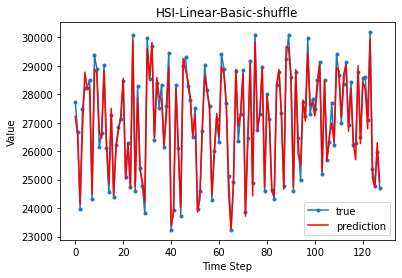

In [7]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-Linear-Basic-shuffle')
plt.legend()

In [8]:
mean_squared_error(y_test,y_pred,squared=False)

273.3303645604462

In [9]:
mean_absolute_percentage_error(y_test,y_pred)

0.007925370620217736

In [10]:
r2_score(y_test,y_pred)

0.9768248244631461